In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import networkx as nx
from pyvis.network import Network

In [135]:
df = pd.read_csv("soc-sign-bitcoinotc.csv", header=None)
greedy = pd.read_csv("greedy_example.csv")
time = greedy["Time"].values

In [136]:
df = df.rename(columns={0: "Source", 1:"Target", 2:"Weights"})

In [138]:
influenced = np.nonzero(time)[0]
influenced = [x + 1 for x in influenced]

In [139]:
df = df[(df["Source"].isin(influenced)) & (df["Target"].isin(influenced))]
df

,Source,Target,Weights,3
7169,1543,1544,3,1.320078e+09
7170,1544,1543,3,1.320078e+09
7332,1543,1574,3,1.321404e+09
7333,1574,1543,3,1.321404e+09
7341,1543,1582,1,1.321468e+09
...,...,...,...,...
14061,2668,2674,-10,1.348610e+09
14062,2668,1543,1,1.348614e+09
14063,2683,2685,10,1.348620e+09
14064,2685,2683,10,1.348621e+09


In [124]:
G = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr="Weights")

In [125]:
colormap = sns.color_palette("husl", 6)
colors = [colormap[time[node-1]-1] for node in G.nodes]
handles = []
for i, color in enumerate(colormap):
    handles.append(mpatches.Patch(color=color, label=f"T = {i+1}"))

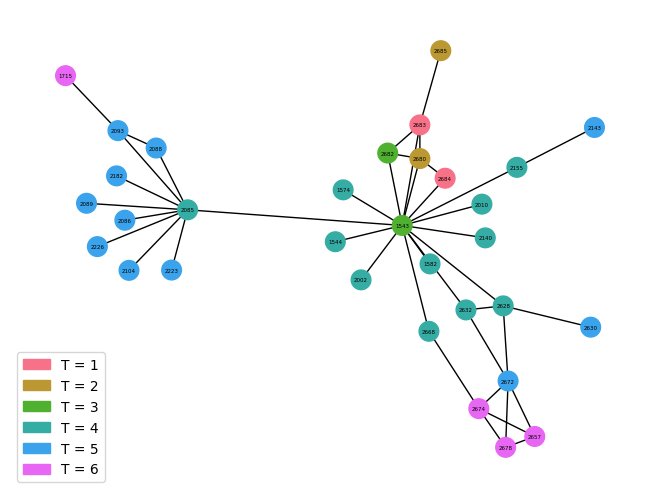

In [127]:
nx.draw(G, node_size=200, arrows=True, node_color=colors, with_labels=True, font_size=4)
plt.legend(handles=handles)

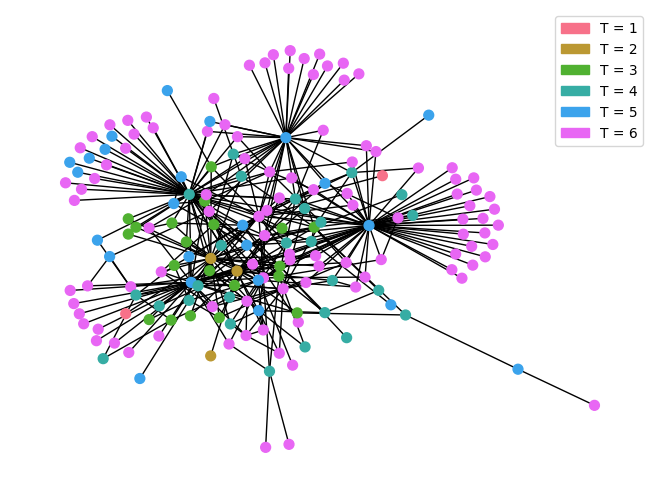

In [143]:
df = pd.read_csv("soc-sign-bitcoinotc.csv", header=None)
opt = pd.read_csv("opt_example.csv")
time = opt["Time"].values
df = df.rename(columns={0: "Source", 1:"Target", 2:"Weights"})
influenced = np.nonzero(time)[0]
influenced = [x + 1 for x in influenced]
df = df[(df["Source"].isin(influenced)) & (df["Target"].isin(influenced))]
G = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr="Weights")
colormap = sns.color_palette("husl", 6)
colors = [colormap[time[node-1]-1] for node in G.nodes]
handles = []
for i, color in enumerate(colormap):
    handles.append(mpatches.Patch(color=color, label=f"T = {i+1}"))
nx.draw(G, node_size=50, arrows=True, node_color=colors)
plt.legend(handles=handles)

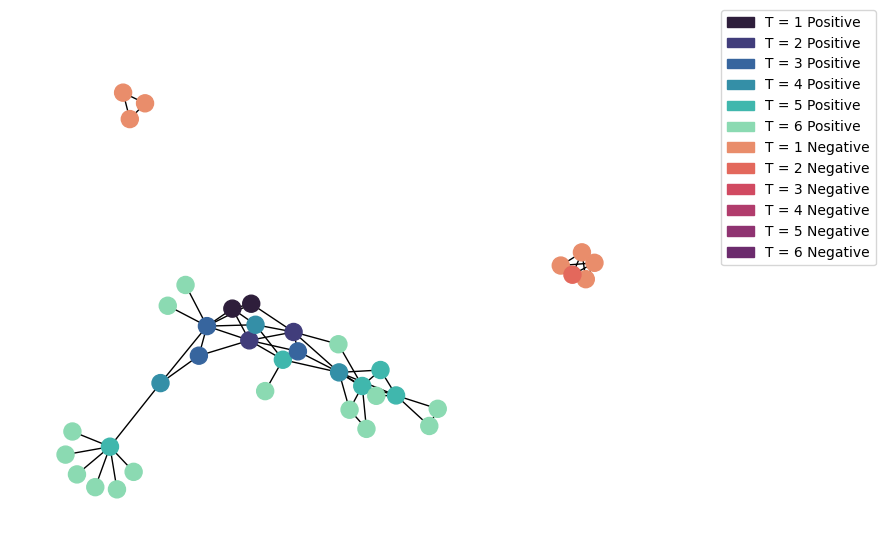

In [12]:
df = pd.read_csv("soc-sign-bitcoinotc.csv", header=None)
opt = pd.read_csv("opt_comp.csv")
time = opt["Time"].values
comp = opt["Comp"].values
df = df.rename(columns={0: "Source", 1:"Target", 2:"Weights"})
influenced = np.nonzero(time)[0]
influenced = [x + 1 for x in influenced]
df = df[(df["Source"].isin(influenced)) & (df["Target"].isin(influenced))]
G = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr="Weights")
colormap1 = sns.color_palette("mako", 6)
colormap2 = sns.color_palette("flare", 6)
colors = []
for node in G.nodes:
    if comp[node-1] == 0:
        colors.append(colormap1[time[node-1]-1])
    else:
        colors.append(colormap2[time[node-1]-1])
handles = []
for i, color in enumerate(colormap1):
    handles.append(mpatches.Patch(color=color, label=f"T = {i+1} Positive"))
for i, color in enumerate(colormap2):
    handles.append(mpatches.Patch(color=color, label=f"T = {i+1} Negative"))
nx.draw(G, node_size=150, arrows=True, node_color=colors)
plt.legend(handles=handles, bbox_to_anchor=(1.1, 1.1))